# **Robust Lasso Zero : Compressed Sensing Project**

Elise Barrère (ENSAE) | Yannis Bouachera (ENSAE)

**Paper** : Robust Lasso-Zero for sparse corruption and model selection with missing covariates (*Scandinavian Journal of Statistics*, 2020)

**Authors** : Pascaline Descloux, Claire Boyer, Julie Josse, Aude Sportisse, and Sylvain Sardy

## Table of Content:
* [Introduction](#first-bullet)
* [Description of the algorithms](#2-bullet)
    * [Lasso Zero](#alg-lass0)
    * [Robust Lasso Zero](#alg-Rlass0)
* [Theoretical results on Thresholded Justice Pursuit](#third-bullet)
    * [First result](#1-res)
    * [Second result](#2-res)
    * [Application on Missing covariates](#application)
* [Implementation](#implementation)
    * [Lasso Zero Functions](#l0functions)
    * [Robust Lasso Zero function](#Rl0functions)
* [Simulations](#simulations)
    * [Example of code](#excode)
    * [Results](#results)
* [Extension](#extension)
* [Conclusion](#conclusion)
* [Appendix](#appendix)
    * [Simulations with *s*-oracle hyperparameter tuning](#soracle)

<a class="anchor" id="first-bullet"></a>
## Introduction

The authors propose an extension of their Lasso Zero method (initially designed for sparse linear models) to the sparse corruption problem, with an interesting application to the problem of variable selection with missing covariates.
Before describing the different results and algorithms proposed by the authors, we give a short reminder on some important concepts and notations : 

- A sparse linear model can be defined as follows : 
$$ y =  Xβ^0 + \epsilon $$
Where $\epsilon \in \mathbb{R^n}$ is gaussian noise vector, $X \in \mathbb{R^{n \times p}}$ with p> n and $\beta^0 \in \mathbb{R^p}$ is s-sparse. 
- The sparse corruption problem is a more general version of sparse linear models  : 
$$ y =  Xβ^0 + \sqrt{n}\omega^0 + \epsilon $$ 
where $\omega^0 \in \mathbb{R^n}$ is k-sparse.
- The Basis Pursuit (BP) problem is defined as :  
	$$ \min_{\beta \in \mathbb{R^p}}  \|\beta\|_1 \quad s.t \quad y =  Xβ \quad \quad \mbox{(BP)} $$
- If $T$ is a finite set of integers and $X \in \mathbb{R^{n \times p}}$ , $X_T$ denotes the submatrix of size $n \times |T|$ indexed by T
- $ \overline{T}$  denotes the complementary set of T.



## Description of the algorithms
<a class="anchor" id="2-bullet"></a>

### **Lasso zero** 
<a class="anchor" id="alg-lass0"></a>

In order to adapt BP to noisy data, it is natural to think about allowing $Y-X\beta$ to be positive, but not too high : 
 $$
	\min_{\beta \in \mathbb{R^p}}  \|\beta\|_1 \quad s.t \quad \|y-Xβ\|_2 \le \theta \quad \quad \mbox{(BP denoising)}$$

NB : This Basic Pursuit denoising method has been shown to be equivalent to LASSO :
$$
	\min_{\beta \in \mathbb{R^p} , \omega \in \mathbb{R^n}}  \frac{1}{2}\|y - X\beta\|_2^2 + \lambda_\beta \|\beta\|_1  \quad \quad \mbox{(LASSO)}
$$ \\

However, the authors showed that it was actually more interesting to overfit Y by running a BP, and then to threshold  the result to keep only large coefficients. This is the "overfit-threshold method" at the core of both Lasso zero and Robust Lasso zero. 
Nonetheless, in practice, the signal is often too low to use this method. The authors thus propose to use a noise-dictionnary (random gaussian matrix G) :
If  $rank(G) =n \quad$ then $∃ \gamma_{\epsilon,G}, \quad \epsilon = G\gamma_{\epsilon,G}$. It is then possible to apply BP to $y =  Xβ^0 + \epsilon$ (with an extended design matrix $(X | G)$) in order to estimate $\beta^0$ and  $\gamma_{\epsilon,G}$. The purpose of $G$ is therefore to provide columns which will be selected to fit the noise, allowing $X$ to fit the signal better.
The Lasso algorithm actually repeats this procedure several times so the final estimator is less influenced by unfortunate situations where some columns of G are strongly correlated to some columns of X. Here is a detailed version of the algorithm : 


>1.   For $k = 1, \dots, M$ : generate $G^{(k)} \in \mathbb{R^{n \times q}} $ with i.i.d $\mathcal{N}(0,1)$ entries, then compute:
 $$
	(\hat{\beta}^{(k)},\hat{\gamma}^{(k)}) = \underset{\beta \in \mathbb{R^p} , \gamma \in \mathbb{R^q}}{\text{arg} \min} {}  \|\beta\|_1 + \|\gamma\|_1 \quad s.t \quad y =  Xβ + G^{(k)}\gamma
$$ 
2. Compute $\hat{\beta}^{(l_1)}$ = $\mbox{median}\{\beta^{(k)},  k = 1, \dots, M$\}
3. Threshold the coefficients : compute $\hat{\beta}^{lass0}_j = \eta_\tau(\hat{\beta}^{(l_1)}_j)$ for $j = 1, \dots, P$, where $\eta_\tau$ is such that $\eta_\tau(x)=0 $ if $|x| \le \tau$ and $sign(\eta_\tau(x)) = sign(x) $ otherwise.



### **Robust Lasso zero**
<a class="anchor" id="alg-Rlass0"></a>

Robust Lasso zero consists in a modified version of the Lasso zero in which Basis Pursuit is replaced by Justice Pursuit: $$
	(\hat{\beta}^{JP}_\lambda,\hat{\omega}^{JP}_\lambda) = \underset{\beta \in \mathbb{R^p} ,\omega \in \mathbb{R^n}}{\text{arg} \min} {}  \|\beta\|_1 +  \lambda \|\omega\|_1   \quad s.t \quad y =  Xβ + \sqrt{n}\omega
$$ . This change allows to extend Lasso zero to the sparse corruption problem. Here is a detailed version of the algorithm which, this change aside, is in all aspects similar to lasso zero : 



>1.   For $k = 1, \dots, M$ : generate $G^{(k)} \in \mathbb{R^{n \times q}} $ with i.i.d $\mathcal{N}(0,1)$ entries, then compute:
 $$
	(\hat{\beta}^{(k)}_\lambda,\hat{\omega}^{(k)}_\lambda ,\hat{\gamma}^{(k)}_\lambda) = \underset{\beta \in \mathbb{R^p} ,\omega \in \mathbb{R^n}, \gamma \in \mathbb{R^q}}{\text{arg} \min} {}  \|\beta\|_1 +  \lambda \|\omega\|_1 +  \|\gamma\|_1 $$ $$s.t \quad y =  Xβ + \sqrt{n}\omega + G^{(k)} \gamma
$$ 
2. Compute $\hat{\beta}^{(l_1)}$ = $\mbox{median}\{\beta^{(k)},  k = 1, \dots, M$\}
3. Threshold the coefficients : compute $\hat{\beta}^{Rlass0}_j = \eta_\tau(\hat{\beta}^{(l_1)}_j)$ for $j = 1, \dots, P$, where $\eta_\tau$ is such that  $$\eta_\tau (x) =
 \left\{
    \begin{array}{ll}
        0 & \mbox{if } |x| < \tau \\
        x & \mbox{otherwise.}
    \end{array}
\right.
$$

## Theoretical results on Thresholded Justice Pursuit
<a class="anchor" id="third-bullet"></a>




The authors give interesting theoretical results on a slightly different version of their Robust Lasso zero estimator, in which the noise dictionnaries are discarded. They call this simpler model the Thresholded Justice Pursuit, because it actually consists only in thresholding the result of the Justice Pursuit algorithm :
$$ \hat{\beta}^{TJP}_{\lambda,\tau} = \eta_\tau(\hat{\beta}^{JP}_{\lambda}) \quad \quad \hat{\omega}^{TJP}_{\lambda,\tau} = \eta_\tau(\hat{\omega}^{JP}_{\lambda}) \quad \quad \mbox{(TJP)}$$

### First result
<a class="anchor" id="1-res"></a>

The first result gives necessary and sufficient condition for consistent recovery when the design matrix is fixed but the nonzero absolute coefficients tend to infinite. It is based on the notion of identifiability defined below :

>**Definition** : $(\beta^0, \omega^0) \in \mathbb{R^p} \times \mathbb{R^n} $ is identifiable w.r.t $X \in \mathbb{R^{n\times p}}$ and $\lambda > 0$ if it is the unique solution to $\mbox{(JP)}$ when $y =  Xβ^0 + \sqrt{n}\omega^0$.

The following lemma proves that the identifiability of $(\beta^0, \omega^0)$ only depends on $sign(\beta^0)$ and $sign(\omega^0)$ : 

>**Lemma** : $(\beta^0, \omega^0) \in \mathbb{R^p} \times \mathbb{R^n} $ is identifiable w.r.t $X \in \mathbb{R^{n\times p}}$ and $\lambda > 0$ if and only if $ \forall (\beta, \omega) \ne (0,0),\quad  X\beta + \frac{\sqrt{n}}{\lambda}\omega = 0 ⟹ |sign(\beta^0)^T\beta + sign(\omega^0)^T\omega|< \|\beta_\overline{S^0} \|_1 +  \|\omega_\overline{T^0} \|_1 \quad $, where $S^0$ and $T^0$ respectively denote the support (non-null vectors) of $\beta^0$ and $\omega^0$

Let $\{(\beta^{(r)},\omega^{(r)}\}_{r\in\mathbb{N}^*}$ a sequence satisfying the following assumptions :    
*  $\exists \theta \in \{-1,0,1\}^p, \tilde{\theta} \in \{-1,0,1\}^n \quad s.t \quad \forall r\in\mathbb{N}^*, sign(\beta^{(r)}) = \theta $ and $sign(\omega^{(r)}) = \tilde{\theta}$
*  $\underset{r → +∞}{\text{lim}} {} \min\{\beta^{(r)}_{min},\omega^{(r)}_{min}\} = + ∞, $ where $ \beta_{min} = \underset{j}{\text{min }} \beta_j$.
*  $∃q>0, \quad  \frac{\min\{\beta^{(r)}_{min},\omega^{(r)}_{min}\}}{ \max\{\|\beta^{(r)}_{min}\|_∞,\|\omega^{(r)}_{min}\}\|_∞\}} \ge q$

>**Theorem 1** : Let $\lambda >0$ and $X \in \mathbb{R^{n\times p}}$ such that $\forall y \in \mathbb{R}^n$, the solution to $\mbox{(JP)}$ is unique. Then :
* If $(\theta,\tilde{\theta})$ is identifiable, then $\forall \epsilon \in \mathbb{R^n}, \exists R>0,\forall r \ge R, \exists \tau, \quad  \left\{
    \begin{array}{ll}
        sign(\hat{\beta}^{TJP}_{\lambda,\tau}) & = \theta \\
        sign(\hat{\omega}^{TJP}_{\lambda,\tau}) &=\tilde{\theta}
    \end{array}
\right.$ 
* Conversely, let $\epsilon \in \mathbb{R}^n$ and $r \in \mathbb{N}^*$. Then :
$$ \mbox{if} \quad \exists \tau>0, \left\{
    \begin{array}{ll}
        sign(\hat{\beta}^{TJP}_{\lambda,\tau}) & = \theta \\
        sign(\hat{\omega}^{TJP}_{\lambda,\tau}) &=\tilde{\theta}
    \end{array}
\right. \quad \mbox{then} \quad (\theta,\tilde{\theta}) \quad \mbox{is identifiable}$$

### Second result
<a class="anchor" id="2-res"></a>




The second result ensures that, for correlated Gaussian designs and high-enough signal-to-noise ratios, TJP recovers $sign(\beta^0)$ with a high probability, even with a positive fraction of corruptions.

The following assumptions will be used in the theorem below :
* the rows of $X \in \mathbb{R^{n\times p}}$ are random and i.i.d $ ̰\sim \mathcal{N}(0,\Sigma)$
* $ \lambda_{min} > 0$ with $\lambda_{min}(\Sigma) : = \min sp(\Sigma)$
* the variance of the covariates is equal to one
* The noise is assumed to be gaussian :  $\epsilon \sim \mathcal{N}(0,\sigma^2 I_n)$

> **Theorem 2** : under the aforementioned assumptions, choosing $\lambda = \frac{1}{\sqrt{\log(p)}}$ ensures that with probability greater than $1 - ce^{c'n} -\frac{1.14}{n} - 2e^{-\frac{1}{s}(\sqrt{p}-\sqrt{n})^2}$, we have :
$$\exists \tau>0, \quad sign(\hat{\beta}^{TJP}_{\lambda,\tau}) = sign(\beta_0)$$
given that ($C,C',C''$ being numerical constants with $C>144^2$):
* $n \ge C\lambda_{max}(\Sigma)s\log(p)$
* $\frac{n}{k} > max\{\frac{1}{C'},\frac{\lambda_{max}(\Sigma)}{C''\lambda_{min}(\Sigma)}\}$ 
* $\beta^0_{min} > \frac{10\sqrt{2}\max\{1,\lambda\}\sigma\sqrt{p+n}}{\sqrt{\frac{\lambda_{min}(\Sigma)}{4}(\sqrt{\frac{p}{n}}-1)^2+1}}$


## Application to model selection with missing covariates
<a class="anchor" id="appliction"></a>

Before getting into the subject, let's clarify the different missing-data mechanisms (when a matrix $X^{NA}$ with missing values is observed instead of  $X$ ):
*  When data is missing completely at random (**MCAR**), the events that lead to the missing data are independent both of observable variables and of unobservable parameters of interest, and occur entirely at random
* In the case of missing at random data (**MAR**), the missingness of a variable is not random, but only depends on other observed variables with complete information.
* Finally, in the more general case of data missing non at random (**MNAR**), the missingness of a variable also depends on its own value.

Missing data is a challenging problem in high-dimension settings, as discarding an entire row because of one missing value becomes very inadapted. Other solutions have been found, but often rely on strong assumptions 
on the missing value mechanism (e.g supposing the data is MNAR), a lot of parameters tuning or strong assumption on the covariates distribution.

The authors thus propose to apply Robust Lasso zero to the problem of missing covariates. This method is very interesting because it handles MNAR values without specifying a parametric model. Besides, this method doesn't require to specify a model for the covariates, nor to estimate their covariance matrix.

To apply Robust Lasso zero to the missing covariates problem, the authors showed that it could be easily reformulated into a sparse corruption problem. The complete procedure is detailed below:

> **Robust Lasso zero for missing data**
1.   complete the matrix $X^{NA}$ with some values to get a completed matrix $\tilde{X}$
2.  Rewrite the linear problem ($y =  \tilde{X}β^0 + \epsilon$) into a sparse corruption problem ($y =  \tilde{X}β^0 + \sqrt{n}\omega^0 + \epsilon$) with $w^0=\frac{1}{\sqrt{n}}(X-\tilde{X})\beta^0$.
3. Rescale $\tilde{X}$ so all of its columns have an euclidean norm of $\sqrt{n}$
4. Apply Robust Lasso zero algorithm with the design matrix $\tilde{X}$





In the special case model selection with missing covariates, we have : $\beta^0=0 ⟹\omega^0=0$, which means that under the null model, there is no sparse corruption. This allows to use the **Quantile Universal Thresholding (QUT)** methodology to choose the value of $\tau$.

QUT consists in controlling the probability of correctly recognizing the null model when $\beta^0 = 0$ : the QUT threshold is such that $P(\tilde{\beta}=0)=1-\alpha$ When $\beta^0 = 0$.

If $\lambda$ and $\tilde{X}$ are fixed, knowing that $\hat{\beta}^{Rlass0}_j = \eta_\tau(\hat{\beta}^{(l_1)}_j)$ with $\eta_\tau (x) =
 \left\{
    \begin{array}{ll}
        0 & \mbox{if } |x| < \tau \\
        x & \mbox{otherwise.}
    \end{array}
\right.$, the QUT value of $\tau$ is the upper $\alpha$-quantile of $\|\hat{\beta}^{(l1)}_\lambda(\epsilon)\|_∞$, which can be computed efficiently by exploiting the noise coefficients $\hat{\gamma^{(k)}}$ of Robust Lasso-Zero to pivotize $\|\hat{\beta}^{(l1)}_\lambda(\epsilon)\|_∞$ .

The only other hyperparameter is $\lambda$, which the authors recommend to set to 1.

## Implementation
<a class="anchor" id="implementation"></a>

In [ ]:
# if on Google colab uncomment this 
# !pip install scipy --upgrade 

In [1]:
import numpy as np
from scipy import optimize, linalg
from scipy.stats import genextreme as gev
from sklearn.linear_model import LinearRegression
from copy import deepcopy
import pandas as pd

We will implement below the same simulation framework as described in the paper. We generate $X$ and $y$ such that $y = X\beta_0 + ϵ$ where $X \in \mathbf{R}^{n \times p} $, $\beta_0 \in {R}^{p}$ and $\epsilon \in {R}^{n}$ represents the Gaussian noise of variance $\sigma²$. 

We take $n=100$ and $p=200$ and we generate X by drawing $n$ = 100 observations from a Gaussian distribution $N(0, \Sigma)$ , where $\Sigma$ is a Toeplitz matrix which coefficients are a function of $\rho$ the correlation parameter. ($\Sigma_{i,j} = \rho^{|i-j|}$ so when $\rho$ is 0 then $\Sigma$ is the identity). 

We generate $\beta$ by first choosing following uniform distribution among the indexes of $\beta$ which $s$ elements are going to be non-null. Then we draw the non null elements from a normal distribution of the set $\{-1,1\}$.


In [ ]:
n = 100  # sample size
p = 200  # number of covariates
sigma = 0.5  # noise level
rho = 0  # correlation parameter
Sigma = linalg.toeplitz([rho**k for k in range(p)])
s = 3  # sparsity index for beta^0

S = np.random.randint(0, p, s)
beta = np.zeros(p)
beta[S] = 1*np.sign(np.random.normal(size=s))

X = np.random.multivariate_normal(np.zeros(p), Sigma, size=(n))
X = X - np.mean(X, axis=0)
X /= np.std(X, axis=0)

y = np.dot(X[:,S], beta[S]) + np.random.normal(size=n, scale=sigma)

### Lasso Zero Functions 
<a class="anchor" id="l0functions"></a>

Before we go any further in the simulation, let's define our Basis Pursuit function. We are using ''scipy.optimize.linprog'' which minimizes 
$$(linprog)\ :\ \beta^* \in \arg \min_{\beta \in \mathbb{R}^p} \{  <c,\beta> s.t. A\beta=b\}. $$
 

In our case we want to minimise $$(BP)\ :\ \beta^* \in \arg \min_{\beta \in \mathbb{R}^p} \{ \Vert w \Vert_1 \ s.t. X\beta = y.\} $$

$\beta^*$ is solution to $(BP)$ if $\beta^*_{BP} = \beta^*_{linprog}|_+ -\beta_{linprog}^*|_-$ is solution to $(linprog)$ with $c = (1,...1), c \in \mathbb{R}^{2p}$ and $A = [X, -X]$ .

In [ ]:
def BP(X, y):
    """Basis Pursuit function

    Args:
        X (ndarray): input of the constraint
        y (ndarray): input of the constrait (right side)

    Returns:
        ndarray: beta
    """
    _, p = np.shape(X)
    n = y.shape[0]

    obj = np.ones(2*p)

    beq = y
    A_eq = np.hstack([X, -X])

    res = optimize.linprog(c=obj,  A_eq=A_eq,
                           b_eq=beq, method='highs-ds')
    return res.x[:p] - res.x[-p:]

Now that we have defined our Basis Pursuit algorithm, lets implement a function that does the first step of the Lasso algorithm (that is add a $G$ matrix of noise to $X$)

In [ ]:
def M_BP(X, y, meancenterG, standardizeG,  q=None, M=30, returnGammas=True):
    """_summary_

    Args:
        X (ndarray): covariates
        y (ndarray): objective
        meancenterG (bool): determines of we standardize G (mean)
        standardizeG (bool): determines of we standardize G (standard deviation)
        q (int, optional): In case the shape of X is not the one we want for beta
        M (int, optional): number of iteration. Defaults to 30.
        returnGammas (bool, optional): determines if we want to return the coefficients that refer to the G part of the BP. Defaults to True.

    Returns:
        ndarray: all the betas calculated by the algorithm
        ndarray: the median of the all the betas calculated by the algorithm
        ndarray: all the gammas calculated by the algorithm
        ndarray: the median absolute deviation of the all the gammas calculated by the algorith

    """
    n, p = X.shape
    if q is None:
        q = p
    if p == 0:
        q = n

    BPsols = np.zeros((p+q, M))

    if not (type(standardizeG) == int or float):
        standardizeG = 1.

    for m in range(M):
        G = np.random.normal(size=(n, q))
        if meancenterG:
            G = G - np.mean(G, axis=0)
        G = standardizeG * (G / np.std(G, axis=0))
        BPsols[:, m] = BP(np.hstack([X, G]), y)

    Betas = BPsols[:p, ]

    if M == 1:
        medBeta = Betas
    else:
        medBeta = np.median(Betas, axis=1)

    if returnGammas:
        Gammas = BPsols[-p, ]
        nozeroGamma = Gammas[Gammas != 0]
        madGammas = np.median(np.abs(nozeroGamma - np.mean(nozeroGamma)))
    else:
        Gammas = None
        madGammas = None

    return(Betas, medBeta, Gammas, madGammas)

In order to have a functionning Lasso zero algorithm, we also need to implement a working function of the Quantile Universal Thresholding. 

In [ ]:
def upperquant_from_gev(GEVpar, alpha):
    """transforms the GEV results into the upperquant

    Args:
        GEVpar (tuple): results of the gevfit 
        alpha (float): _description_

    Returns:
        float: upperquant
    """
    
    if alpha is None:
        upperQuant = 0
    else:
        if len(GEVpar) == 2:
            upperQuant = GEVpar[0] - GEVpar[1]*np.log(-np.log(1-alpha))
        else:
            if GEVpar[2] == 0:
                upperQuant = GEVpar[0] - GEVpar[1] / GEVpar[2] * np.log(- np.log(1-alpha) ** GEVpar[2] - 1)
            else:
                upperQuant = GEVpar[0] - GEVpar[1]*np.log(-np.log(1-alpha))
    return upperQuant
            
def QUT(X, q=None, M=30,
        alpha=None, sigma=None,
        intercept=True, standardizeX=True,
        standardizeG=None, MCrep=100,
        GEVapprox=True, var_subset=None):
    """performs Quantile Universal Thresholding

    Args:
        X (ndarray): covariates
        q (int, optional): In case the shape of X is not the one we want for beta. Defaults to None.
        M (int, optional): number of iteration of the M_BP. Defaults to 30.
        alpha (float, optional): level. Defaults to None.
        sigma (float, optional): _description_. Defaults to None.
        intercept (bool, optional): determines of we standardize X (mean)
        standardizeX (bool, optional): determines of we standardize X (standard deviation)
        standardizeG (bool, optional): determines of we standardize G (standard deviation)
        MCrep (int, optional): iterations of the QUT algorithm (MC stands for Monte Carlo). Defaults to 100.
        GEVapprox (bool, optional): Determines if we try to approach the threshold using a generalized extreme value distribution. Defaults to True.
        var_subset (list, optional): The length of the coefficients of Beta we need. Defaults to None.

    Returns:  allMC, GEVpar, GEVfit, upperQuant, error
        ndarray: the result of the M_BP
        tuple: the result of the gev fitting if it was done, None otherwise
        bool: if the GEV was correctly fitted
        float: the final threshold
        bool: if there was an error during the fitting of the gev
    """
    n, p = X.shape

    if q is None:
        q = p

    if var_subset is None:
        var_subset = range(p)

    if intercept:
        X = X - np.mean(X, axis=0)
    if standardizeX:
        X = X/np.std(X, axis=0)
    if standardizeG is None:
        standardizeG = standardizeX

    allMC = np.zeros((int(MCrep)))
    is_none_sigma = isinstance(sigma, type(None))

    for r in range(int(MCrep)):
        # print(r)
        eps = np.random.normal(size=n)
        if intercept:
            eps -= np.mean(eps)
        Betas, medBeta, Gammas, madGammas = M_BP(X=X, y=eps,
                                                 q=q, M=M,
                                                 meancenterG=intercept,
                                                 standardizeG=standardizeG,
                                                 returnGammas=is_none_sigma)
        if is_none_sigma:
            if madGammas != madGammas:  # check for nan
                madGammas = 0
            if np.max(np.abs(medBeta[var_subset])) == 0:
                allMC[r] = 0
            else:
                allMC[r] = np.max(np.abs(medBeta[var_subset])) / madGammas
        else:
            allMC[r] = sigma * np.max(np.abs(medBeta[var_subset]))
    error = False
    # print('mext bp qut done')
    if GEVapprox:
        print('fitting GEV distribution')
        try:
            GEVpar = gev.fit(allMC, method="MLE")
            GEVfit = True
            upperQuant = upperquant_from_gev(GEVpar, alpha)
        except:
            GEVfit = False
            error = True
            print('GEV parameters were not estimated')
            GEVpar = None
            if alpha is None:
                upperQuant = None
            else:
                upperQuant = np.quantile(allMC, 1-alpha)
    else:
        print('GEV parameters were not estimated')
        GEVfit = False
        GEVpar = None
        if alpha is None:
            upperQuant = None
        else:
            upperQuant = np.quantile(allMC, 1-alpha)

    return allMC, GEVpar, GEVfit, upperQuant, error


In [ ]:
def get_tau(madGammas, X,
            qut_MC_output=None,
            q=None, M=30,
            alpha=None, sigma=None,
            intercept=True,
            standardizeG=None, MCrep=100,
            GEVapprox=True, var_subset=None):
    """gets the tau from the quantile universale thresholding

    Args:
        madGammas (ndarray): median average differance of the gammas
        X (ndarray): covariates
        qut_MC_output (tuple): the results of the QUT if already performed. Defaults to None. 
        q (int, optional): In case the shape of X is not the one we want for beta. Defaults to None.
        M (int, optional): number of iteration of the M_BP. Defaults to 30.
        alpha (float, optional): level. Defaults to None.
        sigma (float, optional): _description_. Defaults to None.
        intercept (bool, optional): determines of we standardize X (mean)
        standardizeG (bool, optional): determines of we standardize G (standard deviation)
        MCrep (int, optional): iterations of the QUT algorithm (MC stands for Monte Carlo). Defaults to 100.
        GEVapprox (bool, optional): Determines if we try to approach the threshold using a generalized extreme value distribution. Defaults to True.
        var_subset (list, optional): The length of the coefficients of Beta we need. Defaults to None. )
    """

    # we need to determine the tau using quantitave universal thresholding
    if qut_MC_output is None:
        # print('qut began')
        qut_MC_output = QUT(X=X,
                            q=q,
                            M=M,
                            alpha=alpha,
                            sigma=sigma,
                            intercept=intercept,
                            standardizeX=False,
                            standardizeG=standardizeG,
                            GEVapprox=GEVapprox,
                            var_subset=var_subset,
                            MCrep=MCrep)

        allMC, GEVpar, GEVfit, upperQuant, error = qut_MC_output
        if GEVfit:
            quant_type = "GEV"
        else:
            quant_type = 'empirical'
        if (upperQuant == np.inf) or sigma is not None:
            tau = upperQuant
        else:
            tau = madGammas * upperQuant
    else:
        allMC, GEVpar, GEVfit, upperQuant, error = qut_MC_output
        if GEVapprox:
            if not GEVfit:
                print('fitting GEV distribution on allMC')
                try:
                    GEVpar = gev.fit(allMC, method="MLE")
                    GEVfit = True
                    error = False
                except:
                    GEVfit = False
                    error = True
                if GEVfit:
                    quant_type = "GEV"
                    upperQuant = upperquant_from_gev(GEVpar, alpha)

                if error:
                    print('error in gev fit, use empirical quantile')
                    GEVapprox = False
            else:
                if error:
                    print('error in gev fit, use empirical quantile')
                    GEVapprox = False
                else:
                    GEVapprox = False
    if not GEVapprox:
        quant_type = 'empirical'
        upperQuant = np.quantile(allMC, 1 - alpha)

    if (upperQuant == np.inf) or sigma is not None:
        tau = upperQuant
    else:
        tau = madGammas * upperQuant

    return tau, quant_type

In [ ]:
def lass0(X, y, alpha,
          q=None,
          tau=None, M=30,
          sigma=None,
          intercept=True,
          standardizeX=True, standardizeG=None,
          qut_MC_output=None, GEVapprox=True,
          soft_thresholding=False,
          ols=True, var_subset=None, MCrep=100):
    """Computes the full lasso zero algorithm

    Args:
        X (ndarray): matrix of covariates
        y (ndarray): vector objective
        alpha (float): _description_
        q (int, optional):in case the shape of X is not the one we want for beta. Defaults to None
        tau (float, optional): threshold. Defaults to None
        M (int, optional): number of iteration of the M_BP. Defaults to 30.
        sigma (float, optional): _description_. Defaults to None.
        intercept (bool, optional): determines of we standardize X (mean)
        standardizeX (bool, optional): determines of we standardize X (standard deviation)
        standardizeG (bool, optional): determines of we standardize G (standard deviation)
        qut_MC_output (tuple): the results of the QUT if already performed. Defaults to None. 
        GEVapprox (bool, optional): Determines if we try to approach the threshold using a generalized extreme value distribution. Defaults to True.
        soft_thresholding (bool, optional): if true the coefficients are soft thresholded (rather than hard thresholded) at level tau. Defaults to False.
        ols (bool, optional):  whether to refit the nonzero coefficients with an ordinary least squares procedure. Defaults to True.
        var_subset (list, optional): The length of the coefficients of Beta we need. Defaults to None. 
        MCrep (int, optional): iterations of the QUT algorithm (MC stands for Monte Carlo). Defaults to 100.
    
    Returns: 
        ndarray: coefficients
        bool: intercept
        float: fitted_values
        float: residuals
        ndarray: indexes of the non null coefficients
        float: tau, the threshold
        ndarray: all the betas calculated by the algorithm
        ndarray: all the gammas calculated by the algorithm
        ndarray: the median absolute deviation of the all the gammas calculated by the algorith 
        ndarray : the standart deviations of the covariates,
        ndarray: computation method of threshold

    """

    n, p = X.shape
    if q is None:
        q = p
    if p == 0:
        q = n

    if standardizeG is None:
        standardizeG = standardizeX

    if intercept:
        meany = np.mean(y)
        y = y - meany
        meansX = np.mean(X, axis=0)
        X = X - meansX  # à revoir c'est bizarre les transpose à voir le bail sur r
    else:
        meany = 0

    if standardizeX:
        sdsX = np.std(X, axis=0)
        X = X / sdsX
    else:
        sdsX = np.ones((1, p))
    # print(X.shape)
    Betas, betahat, Gammas, madGammas = M_BP(X, y,
                                             intercept, standardizeG,
                                             q=q, M=M,
                                             returnGammas=True)
    # print(betahat.shape, Betas.shape)
    # print('first mextbp done')
    if tau is None:
        # we need to determine the tau using quantitave universal thresholding
        tau, quant_type = get_tau(madGammas, X,
                                  qut_MC_output=qut_MC_output,
                                  q=q, M=M,
                                  alpha=alpha, sigma=sigma,
                                  intercept=intercept,
                                  standardizeG=standardizeG,
                                  MCrep=MCrep,
                                  GEVapprox=GEVapprox,
                                  var_subset=var_subset)
    else:
        quant_type = None   # tau given

    betahat[np.abs(betahat) <= tau] = 0

    if soft_thresholding:
        idx = np.where(np.abs(betahat) > tau)
        betahat[idx] -= np.sign(betahat[idx])*tau

    selected = np.where(betahat != 0)[0]
    if len(selected) > 0 and ols:
        model = LinearRegression()
        model.fit(X[:, selected] - 1, y)  
        betahat[selected] = model.coef_

    coefficients = betahat/sdsX
    if intercept:
        intercept = float(meany - np.dot(meansX.T, coefficients))
    else:
        0

    fitted_values = meany + np.dot(X[:, selected], betahat[selected])
    residuals = (y + meany) - fitted_values

    return(coefficients, intercept,
           fitted_values, residuals,
           selected, tau, Betas,
           Gammas, madGammas, sdsX, quant_type)


These functions are the basis of the Robust lasso zero algorithm as it relies on lasso zero. In order to perform Robust Lasso Zero, we apply the 'lass0' function on an augmented matrix $[X, \frac{\sqrt{n}}{\lambda}I_n]$ instead of $X$.

### Robust Lasso Zero Functions 
<a class="anchor" id="Rl0functions"></a>

In [ ]:
def robustlass0(X, y, lbda=None, alpha=0.05,
                q=None,
                tau=None, M=30,
                sigma=None,
                intercept=True,
                standardizeX=True, standardizeG=None,
                qut_MC_output=None, GEVapprox=True,
                soft_thresholding=False,
                ols=True, var_subset=None, MCrep=100):
    """Computes the full robust lasso zero algorithm

    Args:
        X (ndarray): matrix of covariates
        y (ndarray): vector objective
        lbda (float) : parameter. Defaults to None
        alpha (float): _description_
        q (int, optional):in case the shape of X is not the one we want for beta. Defaults to None
        tau (float, optional): threshold. Defaults to None
        M (int, optional): number of iteration of the M_BP. Defaults to 30.
        sigma (float, optional): _description_. Defaults to None.
        intercept (bool, optional): determines of we standardize X (mean)
        standardizeX (bool, optional): determines of we standardize X (standard deviation)
        standardizeG (bool, optional): determines of we standardize G (standard deviation)
        qut_MC_output (tuple): the results of the QUT if already performed. Defaults to None. 
        GEVapprox (bool, optional): Determines if we try to approach the threshold using a generalized extreme value distribution. Defaults to True.
        soft_thresholding (bool, optional): if true the coefficients are soft thresholded (rather than hard thresholded) at level tau. Defaults to False.
        ols (bool, optional):  whether to refit the nonzero coefficients with an ordinary least squares procedure. Defaults to True.
        var_subset (list, optional): The length of the coefficients of Beta we need. Defaults to None. 
        MCrep (int, optional): iterations of the QUT algorithm (MC stands for Monte Carlo). Defaults to 100.

    Returns:
        ndarray: coefficients
        ndarray: matrix of all the betas computed
    """

    n, p = X.shape

    Betas = np.zeros((p, M))
    # Omegas = np.zeros((n, M))
    # Gammas = np.zeros((n, M))
    n_sqrt = np.sqrt(n)
    eye_n = np.eye(n)
    if lbda is None:  # sibulation
        lbda = 1

    for k in range(M):
        fullX = np.hstack([X, (n_sqrt / lbda) * eye_n])
        lass0_resul = lass0(X=fullX,
                            y=y,
                            tau=tau,
                            q=p,
                            alpha=alpha,
                            intercept=True, 
                            standardizeG=True,
                            M=M,
                            sigma=sigma,
                            standardizeX=standardizeX, 
                            qut_MC_output=qut_MC_output,
                            GEVapprox=GEVapprox,
                            soft_thresholding=soft_thresholding,
                            ols=ols,
                            var_subset=var_subset,
                            MCrep=MCrep)
        
        Betas[k, :] = lass0_resul[0][0:p]
        # Omegas[k, :] = omega_hat
        # Gammas[k; :] = gamma_hat
    
    beta_med = np.median(Betas, axis=0)
    beta_Rlass0 = beta_med[np.abs(beta_med) <= sigma]

    return beta_Rlass0, Betas

## Simulations 
<a class="anchor" id="simulations"></a>
### Example of code
<a class="anchor" id="excode"></a>
We have all the functions we need to start the simulations. Let us define the settings. We need to introduce the missing values generation method. The authors want 

$\mathbb{P}\left(X_{i j}^{\mathrm{NA}}=\mathrm{NA} \mid X_{i j}=x\right)=\frac{1}{1+e^{-a|x|-b}}$

where setting $a$ to 0 means the missing values are MCAR and setting $a$ to 5 means they are MNAR. They then choose $b$ such that overall average
proportion of missing values is $\pi$, with $\pi = 5\%$ or $\pi = 20\%$. In order to avoid useless energy and time consuming computing of this integrale, we use the data that is almost a dictionnary provided in the github repository of this paper, which we transformed from .Rda to .csv. 

In [ ]:
dfb = pd.read_csv('dataframe_b.csv')
def format_b_df(dfb): 
    dfb.index = dfb['a']
    dfb.drop('a', axis=1, inplace=True)
    col = dfb.columns
    dfb = dfb.rename(columns={c: float(c) for c in col })
    return dfb
dfb = format_b_df(dfb)


In [ ]:
a = 5  # 0: MCAR, 5: MNAR
pi = 0.05  # expected proportion of missing values in X
R = 50 # number of simulations

b_idx = np.argmin([np.abs(dfb.loc[a, col]  - pi) for col in dfb.columns])
b = dfb.columns[b_idx]  

alpha = 0.05  # level for QUTd
MCrep = 200  # number of replications for estimating QUT
GEVapprox = True  # estimating QUT from a GEV fit

At each iteration of the simulation we will create another $X$ and $y$ in the same way that we defined earlier. We will add missing data to $X$ by drawing with a uniform law a matrix $U$ of the same as $X$ and appointing missing values to $X$ where $U$ is inferior to $1 - \frac{1}{1+e^{-a|x|-b}}$. We then center X and put $0$s everywhere there where NAs. An example is provided below:

In [ ]:
U = np.random.uniform(size=(n,p))
isNA = U < 1/(1 + np.exp(-a*np.abs(X) - b))
mx = np.ma.masked_array(X, isNA,
                        fill_value=np.nan)
XNA = mx.filled()

isna = np.isnan(XNA)
isna_row = np.where(np.sum(isna, axis=1) > 0)
Ximp = deepcopy(XNA)
meansx = np.nanmean(Ximp, axis=0)
Ximp -= meansx
Ximp[isna] = 0
Ximp /= np.std(Ximp, axis=0)


There must be a way to assess the quality of the estimation of $\beta$. The authors value the exact prediction of $\beta$ by $\hat{\beta}$ just as much as the prediction of $sign(\beta)$. Therefore in our function that computes all the interesting metrics of our simulation, we include two binary variables that are respectively True if $\beta$ and $\hat{\beta}$ are exactly alike and if $sign(\beta)$ and $sign(\hat{\beta})$ are exactly alike.

For each iteration we collect these two variables and other scores, 
- signed True Positive Proportion (TPPs) : $TPPs = \frac{|\{j|\beta^0_j<0,\hat{\beta}_j<0\}| + |\{j|\beta^0_j>0,\hat{\beta}_j>0\}| }{|S^0|}$
- signed False Discovery Proportion (FDPs): $FDPs = \frac{|\hat{S}| - |\{j|\beta^0_j<0,\hat{\beta}_j<0\}| - |\{j|\beta^0_j>0,\hat{\beta}_j>0\}|}{max(1,|\hat{S}|) } $

At the end of the simulation, we take the expection of these metrics and they become the s-True Positive Rate and the s-False Discovery Rate. The expectation of the indicator of $\beta = \hat{\beta}$ becomes the probability of exactitude and the expectation of the indicator of $sign(\beta) = sign(\hat{\beta})$  which is Probability of Sign Recovery (PSR).

In [ ]:
def criteria(betahat, beta):
    """computes the scores to determine how good is betahat as an approximation of beta

    Args:
        betahat (ndarray): estimated data
        beta (ndarray): original data

    Returns:
        int: number of non null values in beta
        bool: True if beta and betahat are exactly alike
        float: TPP
        float: FDP
        bool: True if beta's signs and betahat's signs are exactly alike
        float: TPPs
        float: FDPs
    """
    s = np.sum(beta != 0)  # number of non null values in beta, not sum of these items
    exact = np.all((beta == 0) == (betahat == 0))
    TPP = np.sum((beta != 0) & (betahat != 0)) / s
    FDP = np.sum((beta == 0) & (betahat != 0)) / np.max([1, np.sum(betahat != 0)])
    exactsign = np.all(np.sign(beta) == np.sign(betahat))
    TPPs = (np.sum((betahat > 0) & (beta > 0)) + np.sum((betahat < 0) & (beta < 0))) / s
    FDPs = (np.sum(betahat != 0) - np.sum((beta > 0) & (betahat > 0)) - np.sum((beta < 0) & (betahat < 0))) / np.max([1, np.sum(betahat != 0)])

    return s, exact, TPP, FDP, exactsign, TPPs, FDPs

Here is an example of a cell that we ran during the course of our simulations. As we did not have the time and computing ressources to do all of the simulations the authors presented in their paper, we decided to only do the ones where $\rho = 0$, $\rho$ being the correlation coefficient. We also only did the method of simulation with no oracle, also refered to as automatic hyperparameter tuning. The code for the $s$-oracle hyperparameter tuning is provided in the appendix. 

Another difference with their parameters settings is that we chose to repeat the simulations only 50 times instead of 100, because it would have been too long otherwise. 

In [2]:
import pickle

In [ ]:
print('Simulation began')

save_betas = True 

a = 5  # 0: MCAR, 5: MNAR
pi = 0.05  # expected proportion of missing values in X
R = 50 # number of simulations

b_idx = np.argmin([np.abs(dfb.loc[a, col]  - pi) for col in dfb.columns])
b = dfb.columns[b_idx]  

alpha = 0.05  # level for QUTd
MCrep = 200  # number of replications for estimating QUT
GEVapprox = True  # estimating QUT from a GEV fit

if save_betas :
    betas_lass = []
    betas_rlass = []

results = {}
results['lass0'] = []
results['Rlass0'] = []

for r in range(R):
    print(r)

    # creation of beta
    S = np.random.randint(0, p, s)
    beta = np.zeros(p)
    beta[S] = 1*np.sign(np.random.normal(size=s))

    X = np.random.multivariate_normal(np.zeros(p), Sigma, size=(n))
    X = X - np.mean(X, axis=0)
    X /= np.std(X, axis=0)

    y = np.dot(X[:,S], beta[S]) + np.random.normal(size=n, scale=sigma)

    U = np.random.uniform(size=(n,p))
    isNA = U < 1/(1 + np.exp(-a*np.abs(X) - b))
    mx = np.ma.masked_array(X, isNA,
                            fill_value=np.nan)
    XNA = mx.filled()
    
    isna = np.isnan(XNA)
    isna_row = np.where(np.sum(isna, axis=1) > 0)
    Ximp = deepcopy(XNA)
    meansx = np.nanmean(Ximp, axis=0)
    Ximp -= meansx
    Ximp[isna] = 0
    Ximp /= np.std(Ximp, axis=0)

    subI = np.eye(n)
    subI = subI[:, isna_row[0]]
    subI -= 1/n

    n_sqrt = np.sqrt(n)
    lbda = 1
    delta = n_sqrt / lbda
    # deltas = np.hstack([np.linspace(0.1*n_sqrt, n_sqrt, 50)[:-1], np.linspace(n_sqrt, 10*n_sqrt, 50)])
    fullX = np.hstack([Ximp, delta * subI])
    Rlass0result = lass0(fullX, y, alpha=alpha,
                        standardizeG=True,
                        intercept=True,
                        ols=False, MCrep=40,
                        GEVapprox=True,
                        var_subset=range(p))
    betaRlass0 = Rlass0result[0][:p]

    res_R = criteria(betaRlass0, beta)
    print(res_R)


    lass0result = lass0(Ximp, y, alpha=alpha,
                    standardizeG=True,
                    intercept=True,
                    ols=False, MCrep=40,
                    GEVapprox=GEVapprox,
                    var_subset=range(p))
    
    betalass0 = lass0result[0][:p]
    print('Lasso zero computed')

    res_L = criteria(betalass0, beta)
    print(res_L)
    if save_betas:
        betas_lass.append(betalass0)
        betas_rlass.append(betaRlass0)

    results['lass0'].append(res_L)
    results['Rlass0'].append(res_R)

with open('res_a%s_pi%s.pkl' % (a,pi), 'wb') as f: 
    pickle.dump(results, f)

### Results 
<a class="anchor" id="results"></a>


In [3]:
simulation_parameters = {'s' : [3, 10],
                         'a' : [0, 5],
                        'pi' : [0.05, 0.2]}

In [4]:
res = {}
for s in simulation_parameters['s']:
    for a in simulation_parameters['a']:
        for pi in simulation_parameters['pi']:
            if s == 3:
                res['s%s_a%s_pi%s' % (s, a, pi)] = pickle.load(open('res_a%s_pi%s.pkl' % (a, pi), "rb"))
            else:
                res['s%s_a%s_pi%s' % (s, a, pi)] = pickle.load(open('res_s10_a%s_pi%s.pkl' % (a, pi), "rb"))

In [5]:
PSRs_lasso = {}
PSRs_Rlasso = {}

for key, elt in res.items(): 
    PSRs_lasso[key] = np.mean([elt['lass0'][k][4] for k in range(50)])    
    PSRs_Rlasso[key] = np.mean([elt['Rlass0'][k][4] for k in range(50)])

In [6]:
FDRs_lasso = {}
FDRs_Rlasso = {}

for key, elt in res.items(): 
    FDRs_lasso[key] = np.mean([elt['lass0'][k][3] for k in range(50)])    
    FDRs_Rlasso[key] = np.mean([elt['Rlass0'][k][3] for k in range(50)])

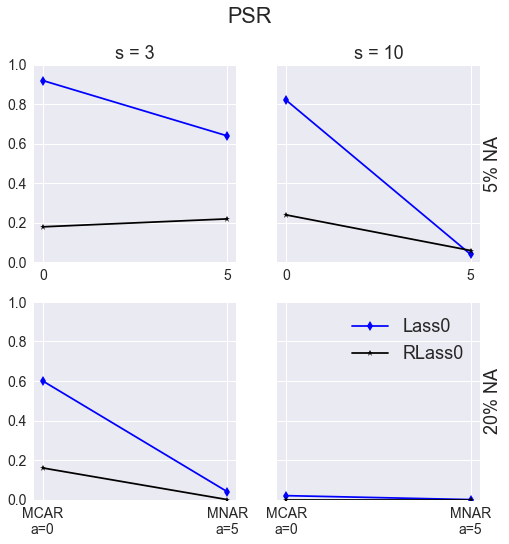

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fontsize = 16
params = {'axes.labelsize': fontsize + 2,
      'font.size': fontsize + 2,
      'legend.fontsize': fontsize + 2,
      'xtick.labelsize': fontsize - 2,
      'ytick.labelsize': fontsize - 2, 
    'axes.titlesize' : fontsize + 2,}
plt.rcParams.update(params)
# Some example data to display
y = np.array([0, 1])
x = np.array([0, 5])

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(8, 8))
#s = 3
# pi = 0.05
axs[0, 0].plot(x, [PSRs_lasso['s3_a0_pi0.05'], PSRs_lasso['s3_a5_pi0.05']],  marker="d",c='blue', label='Lass0')
axs[0, 0].plot(x, [PSRs_Rlasso['s3_a0_pi0.05'], PSRs_Rlasso['s3_a5_pi0.05']], marker="*", c='black', label='RLass0')
axs[0, 0].set_title('s = 3')
axs[0, 0].set_xticks([0, 5])

# axs[0, 0].set_ylabel('20% NA')

#pi 0.2
axs[0, 1].plot(x, [PSRs_lasso['s3_a0_pi0.2'], PSRs_lasso['s3_a5_pi0.2']], c='blue', marker="d", label='Lass0')
axs[0, 1].plot(x , [PSRs_Rlasso['s3_a0_pi0.2'], PSRs_Rlasso['s3_a5_pi0.2']], c='black', marker="*",label='RLass0')
axs[0, 1].set_title('s = 10')
axs[0, 1].set_xticks([0, 5])
axs[0, 1].yaxis.set_label_position("right")
axs[0, 1].set_ylabel('5% NA')
#s = 10
# pi = 0.05
axs[1, 0].plot(x, [PSRs_lasso['s10_a0_pi0.05'], PSRs_lasso['s10_a5_pi0.05']],  c='blue', marker="d", label='Lass0')
axs[1, 0].plot(x, [PSRs_Rlasso['s10_a0_pi0.05'], PSRs_Rlasso['s10_a5_pi0.05']],  c='black',marker="*", label='RLass0')
axs[1, 0].set_xticks([0, 5])
axs[1, 0].set_xticklabels(['MCAR\na=0', 'MNAR\na=5'])

#pi 0.2
axs[1, 1].plot(x, [PSRs_lasso['s10_a0_pi0.2'], PSRs_lasso['s10_a5_pi0.2']], c='blue', marker="d", label='Lass0')
axs[1, 1].plot(x , [PSRs_Rlasso['s10_a0_pi0.2'], PSRs_Rlasso['s10_a5_pi0.2']], c='black',marker="*", label='RLass0')
axs[1, 1].set_xticks([0, 5])
axs[1, 1].set_xticklabels(['MCAR\na=0', 'MNAR\na=5'])
axs[1, 1].yaxis.set_label_position("right")
axs[1, 1].set_ylabel('20% NA')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
    # ax.set_xlabels(['MCAR \n a=0', 'MCAR\na=5'], )
fig.suptitle('PSR')

plt.ylim(0, 1)
plt.legend()
plt.show()

**Interpretation of the PSR results :** If our lass0 performs worse than the one from the authors' simulation, the curves are still pretty similar, the maximum drop of performance compared to the authors being of $\approx 0.3$. However, our RLass0 obtains very low scores compared to the authors : maximum drop of $\approx 0.8$, meaning it performs very bad (and worse than our lass0) in situations where it is supposed to have a high performance. Moreover, in the case of 5%NA and support size of 3, our RLass0 performs better on MNAR data than on MCAR data, this is not supposed to happen as MNAR are harder to deal with. Nonetheless, our RLass0 also seems to be less sensitive to the type of missing data (MCAR or MNAR) than the one from the authors.



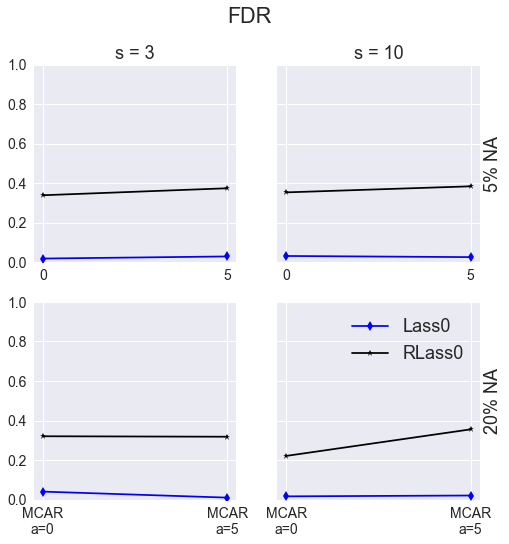

In [17]:
x = np.array([0, 5])

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(8,8))
#s = 3
# pi = 0.05
axs[0, 0].plot(x, [FDRs_lasso['s3_a0_pi0.05'], FDRs_lasso['s3_a5_pi0.05']],  marker="d",c='blue', label='Lass0')
axs[0, 0].plot(x, [FDRs_Rlasso['s3_a0_pi0.05'], FDRs_Rlasso['s3_a5_pi0.05']], marker="*", c='black', label='RLass0')
axs[0, 0].set_title('s = 3')
axs[0, 0].set_xticks([0, 5])

# axs[0, 0].set_ylabel('20% NA')

#pi 0.2
axs[0, 1].plot(x, [FDRs_lasso['s3_a0_pi0.2'], FDRs_lasso['s3_a5_pi0.2']], c='blue', marker="d", label='Lass0')
axs[0, 1].plot(x , [FDRs_Rlasso['s3_a0_pi0.2'], FDRs_Rlasso['s3_a5_pi0.2']], c='black', marker="*",label='RLass0')
axs[0, 1].set_title('s = 10')
axs[0, 1].yaxis.set_label_position("right")
axs[0, 1].set_ylabel('5% NA')
axs[0, 1].set_xticks([0, 5])

#s = 10
# pi = 0.05
axs[1, 0].plot(x, [FDRs_lasso['s10_a0_pi0.05'], FDRs_lasso['s10_a5_pi0.05']],  c='blue', marker="d", label='Lass0')
axs[1, 0].plot(x, [FDRs_Rlasso['s10_a0_pi0.05'], FDRs_Rlasso['s10_a5_pi0.05']],  c='black',marker="*", label='RLass0')
axs[1, 0].set_xticks([0, 5])
axs[1, 0].set_xticklabels(['MCAR\na=0', 'MCAR\na=5'])

#pi 0.2
axs[1, 1].plot(x, [FDRs_lasso['s10_a0_pi0.2'], FDRs_lasso['s10_a5_pi0.2']], c='blue', marker="d", label='Lass0')
axs[1, 1].plot(x , [FDRs_Rlasso['s10_a0_pi0.2'], FDRs_Rlasso['s10_a5_pi0.2']], c='black',marker="*", label='RLass0')
axs[1, 1].set_xticks([0, 5])
axs[1, 1].set_xticklabels(['MCAR\na=0', 'MCAR\na=5'])
axs[1, 1].yaxis.set_label_position("right")
axs[1, 1].set_ylabel('20% NA')

fig.suptitle('FDR')
# for ax in axs.flat:
#     ax.label_outer()
    # ax.set_xlabels(['MCAR \n a=0', 'MCAR\na=5'], )

plt.ylim(0, 1)
plt.legend()
plt.show()

**Interpretation of the FDR results :** When it comes to the FDR, our lass0 performs very good as we get the same results as the authors. However, our RLass0 performs again worse than our lass0, while the authors get very good performance. Here the average drop of performance is  $\approx 0.35$, which is quite high for a FDR.

The smaller gap between our models and those of the authors for the FDR (compared to PSR) can be explained by the fact that finding the

Our assumptions about the performance drop are the same as for the PSR metric.

We are not sure of what causes these performance drops on our models.
Our hypothesis is that it could be due to our Basis Pursuit resolution algorithm, which is different from the one used by the authors, as the equivalent of their R library doesn't exist in Python. Similarly, it could also be due to the way of computing the gev-fit function during the Quantitative Universal Thresholding function. We also reduced the number of simulations, but we do believe that 50 situations (instead of 200) is high enough to allow comparison with the results of the authors. We expected our results to be different but not that much. 

Since the Robust Lasso zero performs worse than Lasso Zero, we could can also imagine that not tuning $\lambda$ (as it was suggested by the authors to use $\lambda = 1$ ) might be the reason of our poor results. 

## Extension 
<a class="anchor" id="extension"></a>

We have decided to explore an aspect that was not adressed in the paper which is when the covariates are missing at random (MAR). 

When MAR, we have that the probability of covariate $i$ to be missing depends not on the covariate $i$ but of the other ones. 

So we have used this probability rule : 

$$\mathbb{P}\left(X_{i j}^{\mathrm{NA}}=\mathrm{NA} \mid X_{i,j+1}=x\right)=\frac{1}{1+e^{-a|x|-b}}$$

with $a=5$ and $b$ calculated as described earlier. 

Here is the method we use to create the missing values in $X$ : 

In [ ]:
indexes = [p-1] + list(range(p-2))
indexes_MAR = [p-1] + list(range(p-2))
X_MAR = X[:,indexes_MAR]

U = np.random.uniform(size=(n,p))
isNA = U < 1/(1 + np.exp(-a*np.abs(X_MAR) - b))
mx = np.ma.masked_array(X, isNA,
                        fill_value=np.nan)
XNA = mx.filled()

And we followed the rest of the same simulation method as we showed earlier. 

In [19]:
# load results 

# res = {}
for s in simulation_parameters['s']:
    for pi in simulation_parameters['pi']:
            res['s%s_mar_pi%s' % (s, pi)] = pickle.load(open('res_mar_s%s_a5_pi%s.pkl' % (s, pi), "rb"))

# PSRs_lasso = {}
# PSRs_Rlasso = {}

for key, elt in res.items(): 
    PSRs_lasso[key] = np.mean([elt['lass0'][k][4] for k in range(50)])    
    PSRs_Rlasso[key] = np.mean([elt['Rlass0'][k][4] for k in range(50)])

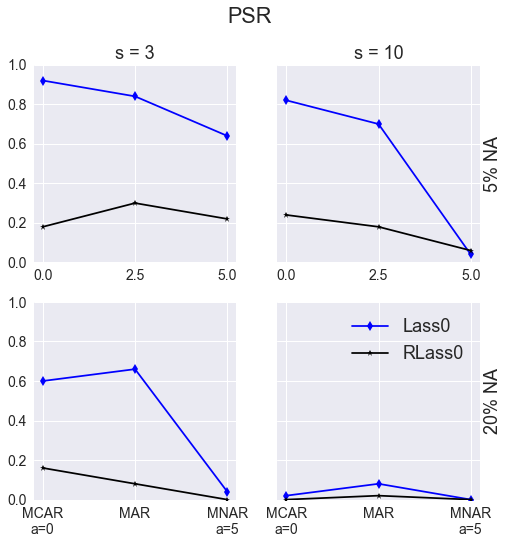

In [20]:

x = np.array([0, 2.5, 5])

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(8, 8))
#s = 3
# pi = 0.05
axs[0, 0].plot(x, [PSRs_lasso['s3_a0_pi0.05'], PSRs_lasso['s3_mar_pi0.05'], PSRs_lasso['s3_a5_pi0.05']],  marker="d",c='blue', label='Lass0')
axs[0, 0].plot(x, [PSRs_Rlasso['s3_a0_pi0.05'], PSRs_Rlasso['s3_mar_pi0.05'], PSRs_Rlasso['s3_a5_pi0.05']], marker="*", c='black', label='RLass0')
axs[0, 0].set_title('s = 3')
axs[0, 0].set_xticks([0,2.5,  5])

# axs[0, 0].set_ylabel('20% NA')

#pi 0.2
axs[0, 1].plot(x, [PSRs_lasso['s3_a0_pi0.2'], PSRs_lasso['s3_mar_pi0.2'], PSRs_lasso['s3_a5_pi0.2']], c='blue', marker="d", label='Lass0')
axs[0, 1].plot(x , [PSRs_Rlasso['s3_a0_pi0.2'], PSRs_Rlasso['s3_mar_pi0.2'], PSRs_Rlasso['s3_a5_pi0.2']], c='black', marker="*",label='RLass0')
axs[0, 1].set_title('s = 10')
axs[0, 1].yaxis.set_label_position("right")
axs[0, 1].set_xticks([0, 2.5, 5])
axs[0, 1].set_ylabel('5% NA')
#s = 10
# pi = 0.05
axs[1, 0].plot(x, [PSRs_lasso['s10_a0_pi0.05'], PSRs_lasso['s10_mar_pi0.05'], PSRs_lasso['s10_a5_pi0.05']],  c='blue', marker="d", label='Lass0')
axs[1, 0].plot(x, [PSRs_Rlasso['s10_a0_pi0.05'], PSRs_Rlasso['s10_mar_pi0.05'], PSRs_Rlasso['s10_a5_pi0.05']],  c='black',marker="*", label='RLass0')
axs[1, 0].set_xticks([0, 2.5, 5])
axs[1, 0].set_xticklabels(['MCAR\na=0', 'MAR', 'MNAR\na=5'])

#pi 0.2
axs[1, 1].plot(x, [PSRs_lasso['s10_a0_pi0.2'], PSRs_lasso['s10_mar_pi0.2'], PSRs_lasso['s10_a5_pi0.2']], c='blue', marker="d", label='Lass0')
axs[1, 1].plot(x , [PSRs_Rlasso['s10_a0_pi0.2'], PSRs_Rlasso['s10_mar_pi0.2'], PSRs_Rlasso['s10_a5_pi0.2']], c='black',marker="*", label='RLass0')
axs[1, 1].set_xticks([0, 2.5, 5])
axs[1, 1].set_xticklabels(['MCAR\na=0', 'MAR', 'MNAR\na=5'])
axs[1, 1].yaxis.set_label_position("right")
axs[1, 1].set_ylabel('20% NA')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
#     ax.set_xlabels(['MCAR \n a=0', 'MCAR\na=5'], )
fig.suptitle('PSR')

plt.ylim(0, 1)
plt.legend()
plt.show()

In [21]:
# FDRs_lasso = {}
# FDRs_Rlasso = {}

for key, elt in res.items(): 
    FDRs_lasso[key] = np.mean([elt['lass0'][k][3] for k in range(50)])    
    FDRs_Rlasso[key] = np.mean([elt['Rlass0'][k][3] for k in range(50)])

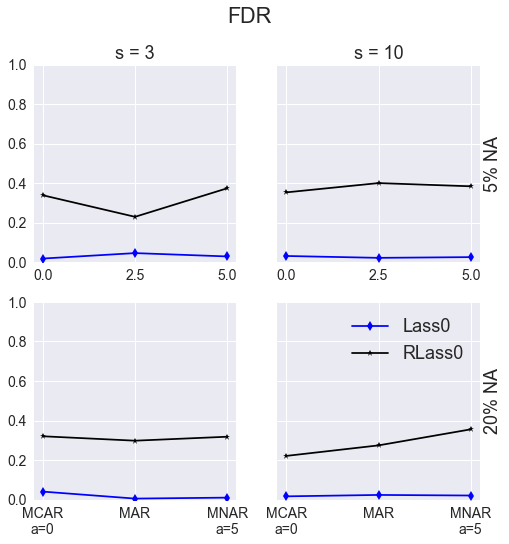

In [22]:
x = np.array([0, 2.5, 5])

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(8, 8))
#s = 3
# pi = 0.05
axs[0, 0].plot(x, [FDRs_lasso['s3_a0_pi0.05'], FDRs_lasso['s3_mar_pi0.05'], FDRs_lasso['s3_a5_pi0.05']],  marker="d",c='blue', label='Lass0')
axs[0, 0].plot(x, [FDRs_Rlasso['s3_a0_pi0.05'], FDRs_Rlasso['s3_mar_pi0.05'], FDRs_Rlasso['s3_a5_pi0.05']], marker="*", c='black', label='RLass0')
axs[0, 0].set_title('s = 3')
axs[0, 0].set_xticks([0,2.5,  5])
# axs[0, 0].set_ylabel('20% NA')

#pi 0.2
axs[0, 1].plot(x, [FDRs_lasso['s3_a0_pi0.2'], FDRs_lasso['s3_mar_pi0.2'], FDRs_lasso['s3_a5_pi0.2']], c='blue', marker="d", label='Lass0')
axs[0, 1].plot(x , [FDRs_Rlasso['s3_a0_pi0.2'], FDRs_Rlasso['s3_mar_pi0.2'], FDRs_Rlasso['s3_a5_pi0.2']], c='black', marker="*",label='RLass0')
axs[0, 1].set_title('s = 10')
axs[0, 1].set_xticks([0,2.5,  5])
axs[0, 1].yaxis.set_label_position("right")
axs[0, 1].set_ylabel('5% NA')
#s = 10
# pi = 0.05
axs[1, 0].plot(x, [FDRs_lasso['s10_a0_pi0.05'], FDRs_lasso['s10_mar_pi0.05'], FDRs_lasso['s10_a5_pi0.05']],  c='blue', marker="d", label='Lass0')
axs[1, 0].plot(x, [FDRs_Rlasso['s10_a0_pi0.05'], FDRs_Rlasso['s10_mar_pi0.05'], FDRs_Rlasso['s10_a5_pi0.05']],  c='black',marker="*", label='RLass0')
axs[1, 0].set_xticks([0, 2.5, 5])
axs[1, 0].set_xticklabels(['MCAR\na=0', 'MAR', 'MNAR\na=5'])

#pi 0.2
axs[1, 1].plot(x, [FDRs_lasso['s10_a0_pi0.2'], FDRs_lasso['s10_mar_pi0.2'], FDRs_lasso['s10_a5_pi0.2']], c='blue', marker="d", label='Lass0')
axs[1, 1].plot(x , [FDRs_Rlasso['s10_a0_pi0.2'], FDRs_Rlasso['s10_mar_pi0.2'], FDRs_Rlasso['s10_a5_pi0.2']], c='black',marker="*", label='RLass0')
axs[1, 1].set_xticks([0, 2.5, 5])
axs[1, 1].set_xticklabels(['MCAR\na=0', 'MAR', 'MNAR\na=5'])
axs[1, 1].yaxis.set_label_position("right")
axs[1, 1].set_ylabel('20% NA')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()
#     ax.set_xlabels(['MCAR \n a=0', 'MCAR\na=5'], )
fig.suptitle('FDR')

plt.ylim(0, 1)
plt.legend()
plt.show()

We added the results on the MAR method of NA generation to our previous graphs. The performances are quite logical because they are between the results of MCAR and MNAR. In terms of FDR, the results are surprisingly better in the case $s=3$ and $\pi = 0.05$. We expected the results of the MAR method to be quite similar as the ones of the MNAR method, because the covariates are drawn alike. 

## Conclusion
<a class="anchor" id="conclusion"></a>

The authors found a method to deal with the problem of model selection with missing covariates, by introducing corruption. Their model is very eficient to deal with MNAR missing data compared to the state of the art. We have tried to replicate their simulations, and introduced a new method of missing values generation. Our results are not satisfying in the case of robust lasso zero, but our results when it comes to lasso zero. 

## Appendix
<a class="anchor" id="appendix"></a>
### Simulations with $s$-oracle hyperparameter tuning
<a class="anchor" id="soracle"></a>

In [ ]:
def tpp(betahat, beta): 
    s = np.sum(beta != 0)
    TPP = np.sum((beta != 0) & (betahat != 0)) / s
    return TPP
print('Simulation began')

save_betas = True 

a = 5  # 0: MCAR, 5: MNAR
pi = 0.05  # expected proportion of missing values in X
R = 50 # number of simulations

b_idx = np.argmin([np.abs(dfb.loc[a, col]  - pi) for col in dfb.columns])
b = dfb.columns[b_idx]  

alpha = 0.05  # level for QUTd
MCrep = 200  # number of replications for estimating QUT
GEVapprox = True  # estimating QUT from a GEV fit

if save_betas :
    betas_lass = []
    betas_rlass = []

results = {}
results['lass0'] = []
results['Rlass0'] = []

for r in range(R):
    print(r)

    # creation of beta
    S = np.random.randint(0, p, s)
    beta = np.zeros(p)
    beta[S] = 1*np.sign(np.random.normal(size=s))

    X = np.random.multivariate_normal(np.zeros(p), Sigma, size=(n))
    X = X - np.mean(X, axis=0)
    X /= np.std(X, axis=0)

    y = np.dot(X[:,S], beta[S]) + np.random.normal(size=n, scale=sigma)

    U = np.random.uniform(size=(n,p))
    isNA = U < 1/(1 + np.exp(-a*np.abs(X) - b))
    mx = np.ma.masked_array(X, isNA,
                            fill_value=np.nan)
    XNA = mx.filled()
    
    isna = np.isnan(XNA)
    isna_row = np.where(np.sum(isna, axis=1) > 0)
    Ximp = deepcopy(XNA)
    meansx = np.nanmean(Ximp, axis=0)
    Ximp -= meansx
    Ximp[isna] = 0
    Ximp /= np.std(Ximp, axis=0)

    subI = np.eye(n)
    subI = subI[:, isna_row[0]]
    subI -= 1/n

    n_sqrt = np.sqrt(n)
    lbda = 1

    # lbda = 1
    # delta = n_sqrt / lbda
    deltas = np.hstack([np.linspace(0.1*n_sqrt, n_sqrt, 50)[:-1], np.linspace(n_sqrt, 10*n_sqrt, 50)])
    allbetas = np.zeros((p, len(deltas)))
    for i in range(len(deltas)):
        delta = deltas[i]
        print('delta de %s' % delta)

        fullX = np.hstack([Ximp, delta * subI])
        Rlass0result = lass0(fullX, y, alpha=alpha,
                             tau=0,
                             standardizeG=True,
                             intercept=True,
                             ols=False, MCrep=MCrep,
                             GEVapprox=GEVapprox,
                             var_subset=range(p))
        betaRdelta = Rlass0result[0][:p]
        thresh = np.sort(np.abs(betaRdelta))[- (s + 1)]
        betaRdelta[np.abs(betaRdelta) < thresh] = 0
        allbetas[:, i] = betaRdelta
    
    all_tpp = [tpp(allbetas[:, i], beta) for i  in range(len(deltas))]
    best_beta_idx = np.where(all_tpp == np.max(all_tpp))[0] # in case there are several maxes
    if len(best_beta_idx) > 1:
        deltadiff = np.abs(deltas - n_sqrt)[best_beta_idx]
        beta_idx = best_beta_idx[np.argmin(deltadiff)]
    else : 
        beta_idx = best_beta_idx[0]

    selected_delta = deltas[beta_idx]
    betaRlass0 = allbetas[:, beta_idx]
    # deltas = np.hstack([np.linspace(0.1*n_sqrt, n_sqrt, 50)[:-1], np.linspace(n_sqrt, 10*n_sqrt, 50)])
    fullX = np.hstack([Ximp, delta * subI])
    Rlass0result = lass0(fullX, y, alpha=alpha,
                        standardizeG=True,
                        intercept=True,
                        ols=False, MCrep=40,
                        GEVapprox=True,
                        var_subset=range(p))
    betaRlass0 = Rlass0result[0][:p]

    res_R = criteria(betaRlass0, beta)
    print(res_R)


    lass0result = lass0(Ximp, y, alpha=alpha,
                    standardizeG=True,
                    intercept=True,
                    ols=False, MCrep=40,
                    GEVapprox=GEVapprox,
                    var_subset=range(p))
    
    betalass0 = lass0result[0][:p]
    print('Lasso zero computed')

    res_L = criteria(betalass0, beta)
    print(res_L)
    if save_betas:
        betas_lass.append(betalass0)
        betas_rlass.append(betaRlass0)

    results['lass0'].append(res_L)
    results['Rlass0'].append(res_R)

with open('res_a%s_pi%s.pkl' % (a,pi), 'wb') as f: 
    pickle.dump(results, f)